In [1]:
from pathlib import Path
import warnings
import geopandas as gpd
import pandas as pd
import numpy as np

import rasterio
from rasterio.plot import show

from shapely.geometry import *
from shapely import affinity
from shapely.errors import ShapelyDeprecationWarning

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib_scalebar.scalebar import ScaleBar
from matplotlib.colors import ListedColormap
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from mpl_toolkits.axes_grid1 import make_axes_locatable
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams["font.family"] = "Arial"

# from createTransectMetrics import calculate_transect_metrics, dense_sample
from scrollstats import BendDataset, calculate_ridge_metrics, RASTER_PATHS

In [2]:
bend_id = "MIS_005"

# Get rasters
dem = rasterio.open(RASTER_PATHS[bend_id]["dem"])
bin_raster = rasterio.open(RASTER_PATHS[bend_id]["bin"])

# Get vectors
bend_ds = BendDataset(bend_id)
ridges = bend_ds.get_ridges(True)
transects = bend_ds.get_transects(True)
centerline = bend_ds.get_centerline(True)
packets = bend_ds.get_packets(True)

In [3]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore", ShapelyDeprecationWarning)
    rich_transects, itx = calculate_ridge_metrics(transects, bin_raster, dem, ridges)

itx = itx.loc[bend_id]

Started BDE
Started TDE for t_004
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started TDE for t_005
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started TDE for t_006
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started TDE for t_007
Started RDE


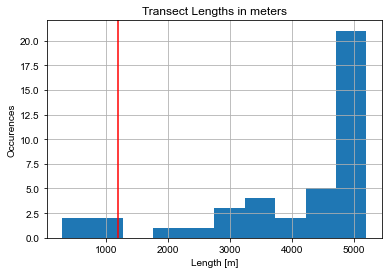

In [4]:
## Remove transects that are too short

cut_off = 1200

transects.geometry.length.hist()
plt.title("Transect Lengths in meters")
plt.xlabel("Length [m]")
plt.ylabel("Occurences")
plt.axvline(cut_off, c="red")

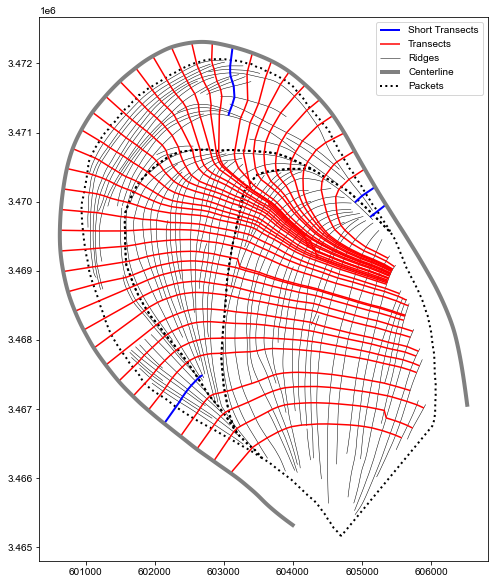

In [5]:
# Filter the transects
filt_trans = transects[transects.geometry.length > cut_off]
outliers = transects[transects.geometry.length < cut_off]

# Plot the difference
fig, ax = plt.subplots(figsize=(10,10))

outliers.plot(ax=ax, color="blue", lw=2, zorder=2, label="Short Transects")
filt_trans.plot(ax=ax, color="red", zorder=3, label="Transects")
ridges.plot(ax=ax, color="k", lw=0.5, zorder=0, label="Ridges")
centerline.plot(ax=ax, color="grey", lw=4, zorder=4, label="Centerline")
packets.boundary.plot(ax=ax, color="k", ls=":", lw=2, zorder=1, label="Packets")
ax.legend();

In [6]:
def normalize_vals(x):
    """Normalize the values within an array x between 0 and 1 """
    norm = (x - x.min())/(x.max()-x.min())
    return norm

In [7]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore", ShapelyDeprecationWarning)
    pkt_transects, itx = calculate_ridge_metrics(filt_trans, bin_raster, dem, ridges, packets)

itx = itx.loc[bend_id]
pkt_transects = pkt_transects.set_index(["packet_id", "transect_id"])

# Filter transects further by dominant wavelength - arbitrary cutoff 
dw_threshold = 1000
pkt_transects = pkt_transects[pkt_transects["fft_spacing"] < dw_threshold]

# Calc normalized dom_wav values
pkt_transects["dom_wav_norm"] = pkt_transects["fft_spacing"].groupby(level=0) \
                                .apply(normalize_vals).values


Started BDE
Started TDE for t_004
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started TDE for t_005
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started TDE for t_006
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started TDE for t_007
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE
Started RDE


In [8]:
# Get info for straight transect
straight_transect = gpd.read_file("/Users/avan/FLUD/BrazosScrolls/data/strick/vector/m5_straight_transect.json").to_crs(packets.crs)
straight_transect["bend_id"] = bend_id
# straight_transect = straight_transect.overlay(packets, how="intersection").set_index(["packet_id", "transect_id"])


with warnings.catch_warnings():
    warnings.simplefilter("ignore", ShapelyDeprecationWarning)
    pkt_transect_straight, itx = calculate_ridge_metrics(straight_transect, bin_raster, dem, ridges, packets)

# itx = itx.loc[bend_id]
pkt_transect_straight = pkt_transect_straight.set_index(["packet_id", "transect_id"])

Started BDE
Started TDE for t_01
Started TDE for t_01
Started TDE for t_01


/var/folders/bl/pshn9drx0bb1h4fsg0dytv0w0000gn/T/ipykernel_37758/708633009.py:114: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


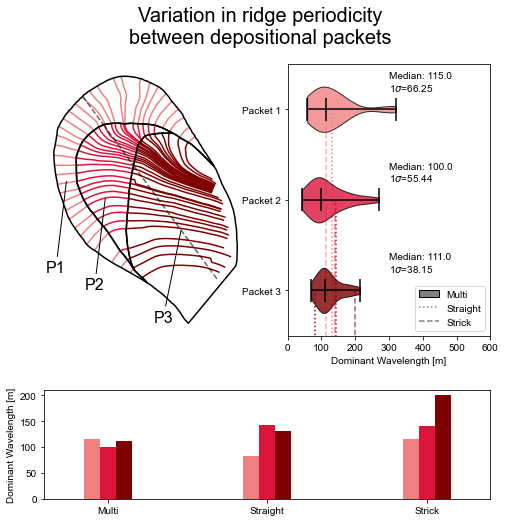

In [10]:
# Create figure object
fig = plt.figure(figsize=(8,8))
gs = plt.GridSpec(3, 2, hspace=0.5)

ax = fig.add_subplot(gs[:-1, 0])
ax.set_axis_off()


# Define color list
c_list = [ "lightcoral", "crimson", "maroon"]

# Get unique packet IDs from the transects
packet_ids = pkt_transects.index.get_level_values("packet_id").unique().sort_values()

# Plot the transects
for i, v in enumerate(packet_ids):
    pkt_transects.loc[v].plot(ax=ax, color=c_list[i])

# Plot straight transect
pkt_transect_straight.plot(ax=ax, color='k', alpha=0.6, ls="--")

# Plot packets
packets.boundary.plot(ax=ax, color="k", zorder=4)

anno_points = [(604000.000, 3465202.813),
               (602085.522, 3466106.736),
               (601000.261, 3466584.976)]

# Annotate packet numbers
for i, v in packets.iterrows():
    centroid = v.geometry.representative_point().coords[:]
    
    ax.annotate(text=f"P{v.packet_id[-1]}", 
                xy=centroid[0], 
                xytext=anno_points[i], 
                arrowprops={"arrowstyle":"-"},
                horizontalalignment="center", 
                size=16)

# ====================================================================================================================    
# Make new subplot for violins
ax = fig.add_subplot(gs[:-1, 1])

# Plot violins
## Isolate dominant wavelength to plot
dw = pkt_transects["fft_spacing"].unstack(level=0) # reshape to 1 column per packet
dw = dw.dropna()                               # drop all rows (transects) with nans

parts = ax.violinplot(dw,
                      showmedians=True,
                      vert=False
                     )

# Alter colors of the violin bodies
for i, (pc, color) in enumerate(zip(parts["bodies"], c_list)):
    pc.set_facecolor(color)
    pc.set_edgecolor("k")
    pc.set_alpha(0.8)
    pc.set_zorder(i)

# Set line color to black
parts["cmedians"].set_edgecolor("k")
parts["cmins"].set_edgecolor("k")
parts["cmaxes"].set_edgecolor("k")
parts["cbars"].set_edgecolor("k")

# # Flip y axis to visually match the map
# ax.invert_yaxis()

# Annotate with info
## Medain and StDev
for i, v in enumerate(dw):
    ax.annotate(f"Median: {dw[v].median()} \n1$\sigma$={dw[v].std():.02f}", xy=(300, i+0.7), verticalalignment="center")

## Strick findings: single transect, ALT classification
s = [115,  140, 200]
for i, (val, color) in enumerate(zip(s, c_list)):
    ax.vlines(val, i+1, 4, color=color, ls="--", alpha=0.6, zorder=i)

## Andrew's findings: Single transect, Profc + RT classification
for i, (val, color) in enumerate(zip(pkt_transect_straight["fft_spacing"].values, c_list)):
    ax.vlines(val, i+1, 4, color=color, ls=":", zorder=i)

ax.set_yticks([1,2,3])
ax.set_yticklabels(["Packet 1", "Packet 2", "Packet 3"])
ax.set_xlabel("Dominant Wavelength [m]")
ax.set_xlim(0, 600)
ax.set_ylim(0.5, 3.5)

ax.invert_yaxis()

# Format Legend
artists = [Patch(facecolor="grey", edgecolor="k", label="Multi"),
           Line2D([], [], color="grey", ls=":", label="Straight"), 
           Line2D([], [], color="grey", ls="--", label="Strick")]

ax.legend(handles=artists, loc="lower right")

# ==========================================================================================================
ax = fig.add_subplot(gs[-1, :])
cmap = ListedColormap(c_list)

multi_med = pkt_transects["fft_spacing"].unstack(level=0).dropna().median()
straight_med = pkt_transect_straight["fft_spacing"].unstack(level=0).dropna().median()

df = pd.DataFrame({"Multi":multi_med, "Straight":straight_med, "Strick":s})
bars = df.T.plot(ax=ax, kind="bar", cmap=cmap, legend=False, width=0.3)
bars.set_xticklabels(df.columns, rotation=0)
bars.set_ylabel("Dominant Wavelength [m]")


fig.suptitle("Variation in ridge periodicity\nbetween depositional packets", size=20)

plt.tight_layout()

file_path = "/Users/avan/FLUD/BrazosScrolls/figures/BendM5_DepositionalPacketVariation_15px_itxmethod.png"
check = input(f"Save figure to {file_path}? [y/n]: ")
if check =="y":
    plt.savefig(file_path, dpi=300)
